In [40]:
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import sklearn.datasets as dta
import datetime
from pandas.plotting import parallel_coordinates
import seaborn as sns 

In [41]:
csv_path = r'Us_Accidents_Arizona_DEC20.csv'

In [42]:
us_data_df = pd.read_csv(csv_path)
us_data_cleaned = us_data_df[['ID','TMC','Severity','Start_Time','End_Time','City','County','State','Zipcode','Country','Temperature(F)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)','Weather_Condition','Sunrise_Sunset','Stop','Traffic_Signal']]
us_data_cleaned

ID  TMC  Severity        Start_Time          End_Time  \
0       A-513395  201         2   12/31/2020 8:33   12/31/2020 9:18   
1       A-513396  201         2   12/31/2020 9:32  12/31/2020 11:03   
2       A-513397  201         2  12/31/2020 12:54  12/31/2020 19:20   
3       A-513398  201         3  12/31/2020 16:04  12/31/2020 17:28   
4       A-513399  201         2  12/31/2020 18:47  12/31/2020 19:48   
...          ...  ...       ...               ...               ...   
15092  A-1048129  201         2   10/9/2019 21:08   10/9/2019 21:57   
15093  A-1048130  201         2   10/9/2019 21:10   10/9/2019 21:58   
15094  A-1048131  201         2   10/9/2019 21:11   10/9/2019 21:58   
15095  A-1048132  201         2   10/9/2019 21:10   10/9/2019 21:57   
15096  A-1048136  201         2    10/9/2019 4:17    10/9/2019 6:43   

                   City    County State     Zipcode Country  Temperature(F)  \
0         Sun City West  Maricopa    AZ  85375-1800      US            43.0   
1            Wickenburg  Maricopa    AZ  85390-3367      US            45.0   
2      Lake Havasu City    Mohave    AZ       86404      US            60.0   
3              Avondale  Maricopa    AZ       85323      US            57.0   
4              Prescott   Yavapai    AZ       86303      US            36.0   
...                 ...       ...   ...         ...     ...             ...   
15092          Glendale  Maricopa    AZ       85307      US            86.0   
15093            Tucson      Pima    AZ       85712      US            75.0   
15094             Tempe  Maricopa    AZ       85283      US            88.0   
15095             Tempe  Maricopa    AZ  85281-3715      US            88.0   
15096          Chambers    Apache    AZ       86502      US            50.0   

       Visibility(mi)  Wind_Speed(mph)  Precipitation(in) Weather_Condition  \
0                10.0              5.0                0.0            Cloudy   
1                10.0              3.0                0.0     Light Drizzle   
2                10.0             12.0                0.0              Fair   
3                10.0              5.0                NaN            Cloudy   
4                10.0              6.0                0.0            Cloudy   
...               ...              ...                ...               ...   
15092            10.0              0.0                0.0              Fair   
15093            10.0              6.0                0.0              Fair   
15094            10.0             10.0                0.0     Partly Cloudy   
15095            10.0             10.0                0.0     Partly Cloudy   
15096            10.0              6.0                0.0              Fair   

      Sunrise_Sunset   Stop  Traffic_Signal  
0                Day  False            True  
1                Day  False           False  
2                Day   True           False  
3                Day  False           False  
4              Night  False           False  
...              ...    ...             ...  
15092          Night  False            True  
15093          Night  False            True  
15094          Night  False           False  
15095          Night  False           False  
15096          Night  False           False  

[15097 rows x 18 columns]

In [43]:
us_data_cleaned = us_data_cleaned.dropna(how="any")
us_data_maricopa = us_data_cleaned.loc[us_data_cleaned['County'] == 'Maricopa']
us_data_maricopa

ID  TMC  Severity       Start_Time          End_Time  \
0       A-513395  201         2  12/31/2020 8:33   12/31/2020 9:18   
1       A-513396  201         2  12/31/2020 9:32  12/31/2020 11:03   
5       A-513400  201         2  12/31/2020 4:52   12/31/2020 6:07   
8       A-513403  201         2  12/31/2020 6:40   12/31/2020 7:10   
9       A-513404  201         2  12/31/2020 6:54   12/31/2020 7:24   
...          ...  ...       ...              ...               ...   
15088  A-1048125  201         3  10/9/2019 19:45   10/9/2019 21:01   
15090  A-1048127  201         3  10/9/2019 19:46   10/9/2019 21:03   
15092  A-1048129  201         2  10/9/2019 21:08   10/9/2019 21:57   
15094  A-1048131  201         2  10/9/2019 21:11   10/9/2019 21:58   
15095  A-1048132  201         2  10/9/2019 21:10   10/9/2019 21:57   

                City    County State     Zipcode Country  Temperature(F)  \
0      Sun City West  Maricopa    AZ  85375-1800      US            43.0   
1         Wickenburg  Maricopa    AZ  85390-3367      US            45.0   
5            Phoenix  Maricopa    AZ  85027-4008      US            40.0   
8            Phoenix  Maricopa    AZ  85020-1812      US            40.0   
9            Phoenix  Maricopa    AZ       85022      US            39.0   
...              ...       ...   ...         ...     ...             ...   
15088        Phoenix  Maricopa    AZ       85034      US            89.0   
15090        Phoenix  Maricopa    AZ       85034      US            89.0   
15092       Glendale  Maricopa    AZ       85307      US            86.0   
15094          Tempe  Maricopa    AZ       85283      US            88.0   
15095          Tempe  Maricopa    AZ  85281-3715      US            88.0   

       Visibility(mi)  Wind_Speed(mph)  Precipitation(in) Weather_Condition  \
0                10.0              5.0                0.0            Cloudy   
1                10.0              3.0                0.0     Light Drizzle   
5                10.0              0.0                0.0              Fair   
8                10.0              0.0                0.0              Fair   
9                10.0              0.0                0.0              Fair   
...               ...              ...                ...               ...   
15088            10.0             13.0                0.0              Fair   
15090            10.0             13.0                0.0              Fair   
15092            10.0              0.0                0.0              Fair   
15094            10.0             10.0                0.0     Partly Cloudy   
15095            10.0             10.0                0.0     Partly Cloudy   

      Sunrise_Sunset   Stop  Traffic_Signal  
0                Day  False            True  
1                Day  False           False  
5              Night  False            True  
8              Night  False           False  
9              Night  False            True  
...              ...    ...             ...  
15088          Night  False           False  
15090          Night  False           False  
15092          Night  False            True  
15094          Night  False           False  
15095          Night  False           False  

[8316 rows x 18 columns]

In [44]:
#Update the Start_Time and End_Time columns formatting to remove time stamp
us_data_maricopa['Start_Time']=us_data_maricopa['Start_Time'].str.split(' ', expand=True)[0]
us_data_maricopa['End_Time']=us_data_maricopa['End_Time'].str.split(' ', expand=True)[0]
us_data_maricopa['Zipcode']=us_data_maricopa['Zipcode'].str.split('-', expand=True)[0]

C:\Users\ashle\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ashle\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ashle\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [45]:
#convert dates
us_data_maricopa['End_Time'] = pd.to_datetime(us_data_maricopa['End_Time'])
us_data_maricopa['Start_Time'] = pd.to_datetime(us_data_maricopa['Start_Time'])

C:\Users\ashle\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ashle\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
#Create a column to define Day of Week
us_data_maricopa['Weekday'] = us_data_maricopa["Start_Time"].dt.day_name()
us_data_maricopa

C:\Users\ashle\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


ID  TMC  Severity Start_Time   End_Time           City  \
0       A-513395  201         2 2020-12-31 2020-12-31  Sun City West   
1       A-513396  201         2 2020-12-31 2020-12-31     Wickenburg   
5       A-513400  201         2 2020-12-31 2020-12-31        Phoenix   
8       A-513403  201         2 2020-12-31 2020-12-31        Phoenix   
9       A-513404  201         2 2020-12-31 2020-12-31        Phoenix   
...          ...  ...       ...        ...        ...            ...   
15088  A-1048125  201         3 2019-10-09 2019-10-09        Phoenix   
15090  A-1048127  201         3 2019-10-09 2019-10-09        Phoenix   
15092  A-1048129  201         2 2019-10-09 2019-10-09       Glendale   
15094  A-1048131  201         2 2019-10-09 2019-10-09          Tempe   
15095  A-1048132  201         2 2019-10-09 2019-10-09          Tempe   

         County State Zipcode Country  Temperature(F)  Visibility(mi)  \
0      Maricopa    AZ   85375      US            43.0            10.0   
1      Maricopa    AZ   85390      US            45.0            10.0   
5      Maricopa    AZ   85027      US            40.0            10.0   
8      Maricopa    AZ   85020      US            40.0            10.0   
9      Maricopa    AZ   85022      US            39.0            10.0   
...         ...   ...     ...     ...             ...             ...   
15088  Maricopa    AZ   85034      US            89.0            10.0   
15090  Maricopa    AZ   85034      US            89.0            10.0   
15092  Maricopa    AZ   85307      US            86.0            10.0   
15094  Maricopa    AZ   85283      US            88.0            10.0   
15095  Maricopa    AZ   85281      US            88.0            10.0   

       Wind_Speed(mph)  Precipitation(in) Weather_Condition Sunrise_Sunset  \
0                  5.0                0.0            Cloudy            Day   
1                  3.0                0.0     Light Drizzle            Day   
5                  0.0                0.0              Fair          Night   
8                  0.0                0.0              Fair          Night   
9                  0.0                0.0              Fair          Night   
...                ...                ...               ...            ...   
15088             13.0                0.0              Fair          Night   
15090             13.0                0.0              Fair          Night   
15092              0.0                0.0              Fair          Night   
15094             10.0                0.0     Partly Cloudy          Night   
15095             10.0                0.0     Partly Cloudy          Night   

        Stop  Traffic_Signal    Weekday  
0      False            True   Thursday  
1      False           False   Thursday  
5      False            True   Thursday  
8      False           False   Thursday  
9      False            True   Thursday  
...      ...             ...        ...  
15088  False           False  Wednesday  
15090  False           False  Wednesday  
15092  False            True  Wednesday  
15094  False           False  Wednesday  
15095  False           False  Wednesday  

[8316 rows x 19 columns]

In [47]:
#creating new columns for Month and Day to create seasons columns
us_data_maricopa["Month"] = pd.DatetimeIndex(us_data_maricopa["Start_Time"]).month
us_data_maricopa["Day"] = pd.DatetimeIndex(us_data_maricopa["Start_Time"]).day
us_data_maricopa["Year"] = pd.DatetimeIndex(us_data_maricopa["Start_Time"]).year
us_data_maricopa["Season"] = ""

C:\Users\ashle\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ashle\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ashle\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [48]:
#Drop any data from 2019
us_data_maricopa = us_data_maricopa[us_data_maricopa['Year'] == 2020]
us_data_maricopa


ID  TMC  Severity Start_Time   End_Time           City    County  \
0      A-513395  201         2 2020-12-31 2020-12-31  Sun City West  Maricopa   
1      A-513396  201         2 2020-12-31 2020-12-31     Wickenburg  Maricopa   
5      A-513400  201         2 2020-12-31 2020-12-31        Phoenix  Maricopa   
8      A-513403  201         2 2020-12-31 2020-12-31        Phoenix  Maricopa   
9      A-513404  201         2 2020-12-31 2020-12-31        Phoenix  Maricopa   
...         ...  ...       ...        ...        ...            ...       ...   
13310  A-982294  201         2 2020-01-03 2020-01-03        Phoenix  Maricopa   
13311  A-982295  201         2 2020-01-03 2020-01-03      El Mirage  Maricopa   
13313  A-982297  201         2 2020-01-03 2020-01-03        Phoenix  Maricopa   
13314  A-982298  201         2 2020-01-03 2020-01-03        Phoenix  Maricopa   
13315  A-982299  201         2 2020-01-03 2020-01-03        Phoenix  Maricopa   

      State Zipcode Country  ...  Precipitation(in)  Weather_Condition  \
0        AZ   85375      US  ...                0.0             Cloudy   
1        AZ   85390      US  ...                0.0      Light Drizzle   
5        AZ   85027      US  ...                0.0               Fair   
8        AZ   85020      US  ...                0.0               Fair   
9        AZ   85022      US  ...                0.0               Fair   
...     ...     ...     ...  ...                ...                ...   
13310    AZ   85016      US  ...                0.0      Partly Cloudy   
13311    AZ   85335      US  ...                0.0      Partly Cloudy   
13313    AZ   85042      US  ...                0.0               Fair   
13314    AZ   85031      US  ...                0.0               Fair   
13315    AZ   85040      US  ...                0.0               Fair   

       Sunrise_Sunset   Stop Traffic_Signal   Weekday  Month  Day  Year  \
0                 Day  False           True  Thursday     12   31  2020   
1                 Day  False          False  Thursday     12   31  2020   
5               Night  False           True  Thursday     12   31  2020   
8               Night  False          False  Thursday     12   31  2020   
9               Night  False           True  Thursday     12   31  2020   
...               ...    ...            ...       ...    ...  ...   ...   
13310           Night  False           True    Friday      1    3  2020   
13311           Night  False           True    Friday      1    3  2020   
13313           Night  False           True    Friday      1    3  2020   
13314           Night  False           True    Friday      1    3  2020   
13315           Night  False           True    Friday      1    3  2020   

       Season  
0              
1              
5              
8              
9              
...       ...  
13310          
13311          
13313          
13314          
13315          

[7027 rows x 23 columns]

In [49]:
#inserting seasons columns based on month and day
us_data_maricopa.loc[(us_data_maricopa["Month"] == 1), ["Season"]] = "Winter"
us_data_maricopa.loc[(us_data_maricopa["Month"] == 2), ["Season"]] = "Winter"
us_data_maricopa.loc[(us_data_maricopa["Month"] >= 3) & (us_data_maricopa["Month"] <= 5), ["Season"]] = "Spring"
us_data_maricopa.loc[(us_data_maricopa["Month"] >= 6) & (us_data_maricopa["Month"] <= 8), ["Season"]] = "Summer"

us_data_maricopa.loc[(us_data_maricopa["Month"] >= 9) & (us_data_maricopa["Month"] <= 11), ["Season"]] = "Autumn"

us_data_maricopa.loc[(us_data_maricopa["Month"] == 12), ["Season"]] = "Winter"
us_data_maricopa

C:\Users\ashle\anaconda3\envs\pythondata\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\ashle\anaconda3\envs\pythondata\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\ashle\anaconda3\envs\pythondata\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

ID  TMC  Severity Start_Time   End_Time           City    County  \
0      A-513395  201         2 2020-12-31 2020-12-31  Sun City West  Maricopa   
1      A-513396  201         2 2020-12-31 2020-12-31     Wickenburg  Maricopa   
5      A-513400  201         2 2020-12-31 2020-12-31        Phoenix  Maricopa   
8      A-513403  201         2 2020-12-31 2020-12-31        Phoenix  Maricopa   
9      A-513404  201         2 2020-12-31 2020-12-31        Phoenix  Maricopa   
...         ...  ...       ...        ...        ...            ...       ...   
13310  A-982294  201         2 2020-01-03 2020-01-03        Phoenix  Maricopa   
13311  A-982295  201         2 2020-01-03 2020-01-03      El Mirage  Maricopa   
13313  A-982297  201         2 2020-01-03 2020-01-03        Phoenix  Maricopa   
13314  A-982298  201         2 2020-01-03 2020-01-03        Phoenix  Maricopa   
13315  A-982299  201         2 2020-01-03 2020-01-03        Phoenix  Maricopa   

      State Zipcode Country  ...  Precipitation(in)  Weather_Condition  \
0        AZ   85375      US  ...                0.0             Cloudy   
1        AZ   85390      US  ...                0.0      Light Drizzle   
5        AZ   85027      US  ...                0.0               Fair   
8        AZ   85020      US  ...                0.0               Fair   
9        AZ   85022      US  ...                0.0               Fair   
...     ...     ...     ...  ...                ...                ...   
13310    AZ   85016      US  ...                0.0      Partly Cloudy   
13311    AZ   85335      US  ...                0.0      Partly Cloudy   
13313    AZ   85042      US  ...                0.0               Fair   
13314    AZ   85031      US  ...                0.0               Fair   
13315    AZ   85040      US  ...                0.0               Fair   

       Sunrise_Sunset   Stop Traffic_Signal   Weekday  Month  Day  Year  \
0                 Day  False           True  Thursday     12   31  2020   
1                 Day  False          False  Thursday     12   31  2020   
5               Night  False           True  Thursday     12   31  2020   
8               Night  False          False  Thursday     12   31  2020   
9               Night  False           True  Thursday     12   31  2020   
...               ...    ...            ...       ...    ...  ...   ...   
13310           Night  False           True    Friday      1    3  2020   
13311           Night  False           True    Friday      1    3  2020   
13313           Night  False           True    Friday      1    3  2020   
13314           Night  False           True    Friday      1    3  2020   
13315           Night  False           True    Friday      1    3  2020   

       Season  
0      Winter  
1      Winter  
5      Winter  
8      Winter  
9      Winter  
...       ...  
13310  Winter  
13311  Winter  
13313  Winter  
13314  Winter  
13315  Winter  

[7027 rows x 23 columns]

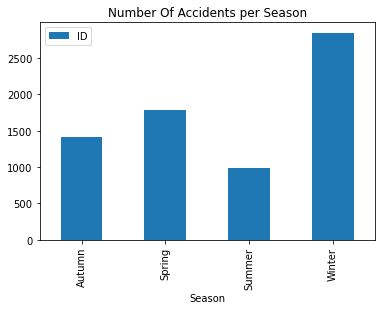

In [50]:
#Average Number of accidents per month/season
#create a new column with if/then based on date to categorize into seasons
#create bar graph 
season_count = us_data_maricopa.groupby('Season').count()
season_count_clean = season_count['ID']
season_count_clean = pd.DataFrame(season_count_clean)
season_count_clean.plot(kind='bar', title='Number Of Accidents per Season')

plt.show()

In [51]:
#get count of days per Season
#count_seasons_grouped = count_seasons.groupby['Season'].
count_seasons = us_data_maricopa.groupby(['Season'])
count_seasons = count_seasons['Start_Time'].nunique()
count_seasons

Season
Autumn    90
Spring    86
Summer    61
Winter    89
Name: Start_Time, dtype: int64

In [52]:
#Highest per day
highest_per_day = us_data_maricopa.groupby(['Start_Time']).nunique()
highest_per_days = highest_per_day[highest_per_day['ID']==highest_per_day['ID'].max()]


In [53]:
lowest_per_day = highest_per_day[highest_per_day['ID']==highest_per_day['ID'].min()]

In [54]:
#average number of accidents per recorded day
average_per_day = highest_per_day['ID'].mean()
average_per_day

21.55521472392638

In [55]:
#Accident Location vs Total Annual Accidents
#Cities with Most Accidents (Top 5)
city_count = us_data_maricopa.groupby(['City']).nunique()
top_5_cities = city_count.sort_values('ID', ascending=False)


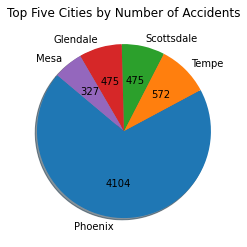

In [56]:
x_values = ['Phoenix','Tempe','Scottsdale','Glendale','Mesa']
y_values = [4104,572,475,475,327]
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(p=pct,v=val)
    return my_autopct
plt.pie(y_values,labels=x_values,startangle=140,autopct=make_autopct(y_values),shadow=True)
plt.title("Top Five Cities by Number of Accidents")
plt.show()

In [57]:
#Highest Days and Weather conditions
feb13_data = us_data_maricopa.loc[(us_data_maricopa['Start_Time'] == '2020-02-13')]
feb20_data = us_data_maricopa.loc[(us_data_maricopa['Start_Time'] == '2020-02-20')]


In [58]:
feb13_data = feb13_data.groupby(['Weather_Condition']).nunique()



In [59]:
feb20_data = feb20_data.groupby(['Weather_Condition']).nunique()

In [60]:
average_weather = us_data_maricopa.groupby('Start_Time').mean()
accident_count = us_data_maricopa.groupby('Start_Time').count()
accident_count

ID  TMC  Severity  End_Time  City  County  State  Zipcode  \
Start_Time                                                              
2020-01-01  22   22        22        22    22      22     22       22   
2020-01-02  54   54        54        54    54      54     54       54   
2020-01-03  62   62        62        62    62      62     62       62   
2020-01-04   6    6         6         6     6       6      6        6   
2020-01-05   7    7         7         7     7       7      7        7   
...         ..  ...       ...       ...   ...     ...    ...      ...   
2020-12-27   7    7         7         7     7       7      7        7   
2020-12-28  18   18        18        18    18      18     18       18   
2020-12-29  14   14        14        14    14      14     14       14   
2020-12-30  25   25        25        25    25      25     25       25   
2020-12-31  15   15        15        15    15      15     15       15   

            Country  Temperature(F)  ...  Precipitation(in)  \
Start_Time                           ...                      
2020-01-01       22              22  ...                 22   
2020-01-02       54              54  ...                 54   
2020-01-03       62              62  ...                 62   
2020-01-04        6               6  ...                  6   
2020-01-05        7               7  ...                  7   
...             ...             ...  ...                ...   
2020-12-27        7               7  ...                  7   
2020-12-28       18              18  ...                 18   
2020-12-29       14              14  ...                 14   
2020-12-30       25              25  ...                 25   
2020-12-31       15              15  ...                 15   

            Weather_Condition  Sunrise_Sunset  Stop  Traffic_Signal  Weekday  \
Start_Time                                                                     
2020-01-01                 22              22    22              22       22   
2020-01-02                 54              54    54              54       54   
2020-01-03                 62              62    62              62       62   
2020-01-04                  6               6     6               6        6   
2020-01-05                  7               7     7               7        7   
...                       ...             ...   ...             ...      ...   
2020-12-27                  7               7     7               7        7   
2020-12-28                 18              18    18              18       18   
2020-12-29                 14              14    14              14       14   
2020-12-30                 25              25    25              25       25   
2020-12-31                 15              15    15              15       15   

            Month  Day  Year  Season  
Start_Time                            
2020-01-01     22   22    22      22  
2020-01-02     54   54    54      54  
2020-01-03     62   62    62      62  
2020-01-04      6    6     6       6  
2020-01-05      7    7     7       7  
...           ...  ...   ...     ...  
2020-12-27      7    7     7       7  
2020-12-28     18   18    18      18  
2020-12-29     14   14    14      14  
2020-12-30     25   25    25      25  
2020-12-31     15   15    15      15  

[326 rows x 22 columns]

In [61]:
highest_per_day

ID  TMC  Severity  End_Time  City  County  State  Zipcode  \
Start_Time                                                              
2020-01-01  22    1         2         1     9       1      1       18   
2020-01-02  54    2         2         1     9       1      1       36   
2020-01-03  62    3         2         1    12       1      1       34   
2020-01-04   6    3         2         1     3       1      1        5   
2020-01-05   7    1         2         1     3       1      1        7   
...         ..  ...       ...       ...   ...     ...    ...      ...   
2020-12-27   7    2         2         1     3       1      1        7   
2020-12-28  18    1         2         1     7       1      1       16   
2020-12-29  14    2         2         1     4       1      1       11   
2020-12-30  25    4         2         1     5       1      1       15   
2020-12-31  15    1         2         1     8       1      1       15   

            Country  Temperature(F)  ...  Precipitation(in)  \
Start_Time                           ...                      
2020-01-01        1              13  ...                  1   
2020-01-02        1              20  ...                  1   
2020-01-03        1              18  ...                  1   
2020-01-04        1               5  ...                  1   
2020-01-05        1               5  ...                  1   
...             ...             ...  ...                ...   
2020-12-27        1               6  ...                  1   
2020-12-28        1              12  ...                  1   
2020-12-29        1               8  ...                  1   
2020-12-30        1              15  ...                  1   
2020-12-31        1              11  ...                  1   

            Weather_Condition  Sunrise_Sunset  Stop  Traffic_Signal  Weekday  \
Start_Time                                                                     
2020-01-01                  4               2     2               2        1   
2020-01-02                  1               2     2               2        1   
2020-01-03                  3               2     2               2        1   
2020-01-04                  2               1     1               2        1   
2020-01-05                  3               2     1               2        1   
...                       ...             ...   ...             ...      ...   
2020-12-27                  3               2     1               2        1   
2020-12-28                  2               2     2               2        1   
2020-12-29                  4               2     1               2        1   
2020-12-30                  1               2     2               2        1   
2020-12-31                  4               2     2               2        1   

            Month  Day  Year  Season  
Start_Time                            
2020-01-01      1    1     1       1  
2020-01-02      1    1     1       1  
2020-01-03      1    1     1       1  
2020-01-04      1    1     1       1  
2020-01-05      1    1     1       1  
...           ...  ...   ...     ...  
2020-12-27      1    1     1       1  
2020-12-28      1    1     1       1  
2020-12-29      1    1     1       1  
2020-12-30      1    1     1       1  
2020-12-31      1    1     1       1  

[326 rows x 22 columns]

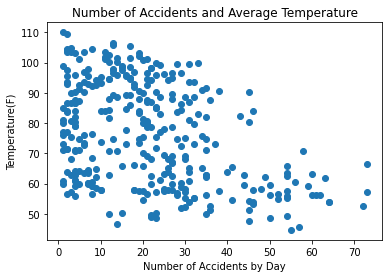

In [62]:
#Graph scatterplot to compare the Accident per day VS Temperature
xvalue = accident_count['ID']
yvalue = average_weather['Temperature(F)']
plt.scatter(xvalue,yvalue)
plt.title('Number of Accidents and Average Temperature')
plt.xlabel('Number of Accidents by Day')
plt.ylabel('Temperature(F)')
plt.show()

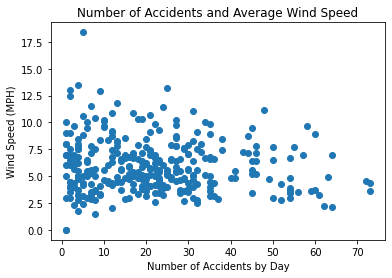

In [63]:
#Create Scatterplot to show correlation between accidents per day and windspeed
xvalue = accident_count['ID']
yvalue = average_weather['Wind_Speed(mph)']
plt.scatter(xvalue,yvalue)
plt.title('Number of Accidents and Average Wind Speed')
plt.xlabel('Number of Accidents by Day')
plt.ylabel('Wind Speed (MPH)')
plt.show()

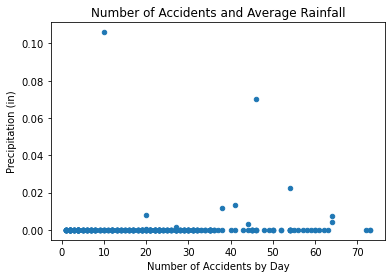

In [64]:
#Create a scatter plot to show correlation between rainfall and accidents per day
xvalue = accident_count['ID']
yvalue = average_weather['Precipitation(in)']
plt.scatter(xvalue,yvalue, s=20)
plt.title('Number of Accidents and Average Rainfall')
plt.xlabel('Number of Accidents by Day')
plt.ylabel('Precipitation (in)')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

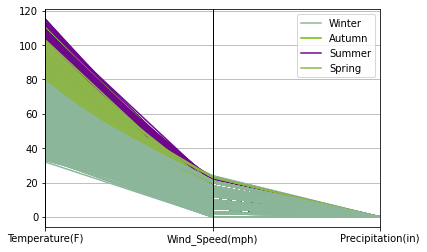

In [65]:
#total accidents and weather type
#scatter plot-- x-axis number grouped by accidents per day
#graph precipitation- windspeed- and temperature
parallel_coordinates(us_data_maricopa, class_column='Season', cols=['Temperature(F)', 'Wind_Speed(mph)', 'Precipitation(in)'])
plt.show

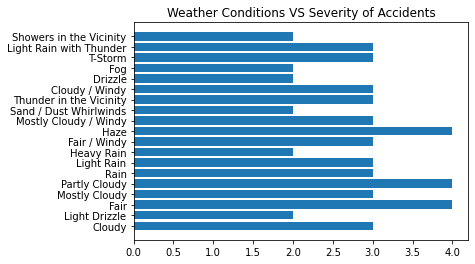

In [66]:
#line graph of severity count

x_value = us_data_maricopa['Weather_Condition']
y_values = us_data_maricopa['Severity']
plt.barh(x_value,y_values)
plt.title('Weather Conditions VS Severity of Accidents')
plt.show()

In [67]:
us_data_cleaned = us_data_cleaned.dropna(how="any")
us_data_coconino = us_data_cleaned.loc[us_data_cleaned['County'] == 'Coconino']


In [68]:
#Convert dates in Start Time into columns 
us_data_coconino['Start_Time']=us_data_coconino['Start_Time'].str.split(' ', expand=True)[0]
us_data_coconino['End_Time']=us_data_coconino['End_Time'].str.split(' ', expand=True)[0]
us_data_coconino['Zipcode']=us_data_coconino['Zipcode'].str.split('-', expand=True)[0]
us_data_coconino['End_Time'] = pd.to_datetime(us_data_coconino['End_Time'])
us_data_coconino['Start_Time'] = pd.to_datetime(us_data_coconino['Start_Time'])
us_data_coconino["Month"] = pd.DatetimeIndex(us_data_coconino["Start_Time"]).month
us_data_coconino["Day"] = pd.DatetimeIndex(us_data_coconino["Start_Time"]).day
us_data_coconino["Year"] = pd.DatetimeIndex(us_data_coconino["Start_Time"]).year
us_data_coconino["Season"] = ""

C:\Users\ashle\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ashle\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ashle\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [69]:
#convert months to season columns
us_data_coconino = us_data_coconino[us_data_coconino['Year'] == 2020]
us_data_coconino.loc[(us_data_coconino["Month"] == 1), ["Season"]] = "Winter"
us_data_coconino.loc[(us_data_coconino["Month"] == 2), ["Season"]] = "Winter"
us_data_coconino.loc[(us_data_coconino["Month"] >= 3) & (us_data_coconino["Month"] <= 5), ["Season"]] = "Spring"
us_data_coconino.loc[(us_data_coconino["Month"] >= 6) & (us_data_coconino["Month"] <= 8), ["Season"]] = "Summer"
us_data_coconino.loc[(us_data_coconino["Month"] >= 9) & (us_data_coconino["Month"] <= 11), ["Season"]] = "Autumn"
us_data_coconino.loc[(us_data_coconino["Month"] == 12), ["Season"]] = "Winter"
us_data_coconino.reset_index(drop=True)

ID  TMC  Severity Start_Time   End_Time          City    County  \
0    A-516241  201         3 2020-12-29 2020-12-29     Flagstaff  Coconino   
1    A-524995  201         2 2020-12-21 2020-12-21     Flagstaff  Coconino   
2    A-529604  201         3 2020-12-17 2020-12-17     Flagstaff  Coconino   
3    A-535397  201         3 2020-12-13 2020-12-13     Flagstaff  Coconino   
4    A-541007  201         3 2020-12-09 2020-12-09     Flagstaff  Coconino   
..        ...  ...       ...        ...        ...           ...       ...   
98   A-966950  241         3 2020-02-22 2020-02-22     Flagstaff  Coconino   
99   A-967543  201         2 2020-02-23 2020-02-23  Grand Canyon  Coconino   
100  A-971615  343         4 2020-02-25 2020-02-25     Flagstaff  Coconino   
101  A-980441  406         3 2020-01-02 2020-01-02     Flagstaff  Coconino   
102  A-980447  201         2 2020-01-02 2020-01-02     Flagstaff  Coconino   

    State Zipcode Country  ...  Wind_Speed(mph)  Precipitation(in)  \
0      AZ   86001      US  ...              7.0                0.0   
1      AZ   86004      US  ...              7.0                0.0   
2      AZ   86004      US  ...             14.0                0.0   
3      AZ   86005      US  ...             14.0                0.0   
4      AZ   86004      US  ...              0.0                0.0   
..    ...     ...     ...  ...              ...                ...   
98     AZ   86004      US  ...              8.0                0.0   
99     AZ   86023      US  ...              9.0                0.0   
100    AZ   86004      US  ...              0.0                0.0   
101    AZ   86001      US  ...              0.0                0.0   
102    AZ   86001      US  ...              0.0                0.0   

     Weather_Condition  Sunrise_Sunset   Stop Traffic_Signal  Month  Day  \
0               Cloudy           Night  False          False     12   29   
1                 Fair             Day  False          False     12   21   
2                 Fair             Day  False          False     12   17   
3                 Fair             Day  False          False     12   13   
4                 Fair           Night  False          False     12    9   
..                 ...             ...    ...            ...    ...  ...   
98              Cloudy           Night  False          False      2   22   
99                Fair             Day  False          False      2   23   
100               Fair           Night  False          False      2   25   
101      Partly Cloudy           Night  False          False      1    2   
102               Fair           Night  False          False      1    2   

     Year  Season  
0    2020  Winter  
1    2020  Winter  
2    2020  Winter  
3    2020  Winter  
4    2020  Winter  
..    ...     ...  
98   2020  Winter  
99   2020  Winter  
100  2020  Winter  
101  2020  Winter  
102  2020  Winter  

[103 rows x 22 columns]

In [70]:
us_data_coconino = pd.DataFrame(us_data_coconino)

In [71]:
us_data_coconino.to_csv('us_data_coconino.csv',encoding='utf-8')
us_data_maricopa.to_csv('us_data_maricopa.csv',encoding='utf-8')

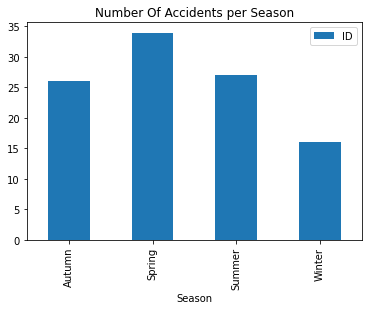

In [72]:
#Average Number of accidents per month/seasonw for Coconino
#create a new column with if/then based on date to categorize into seasons
#create bar graph 
season_count_coco = us_data_coconino.groupby('Season').count()
season_count_coco_clean = season_count_coco['ID']
season_count_coco_clean = pd.DataFrame(season_count_coco_clean)
season_count_coco_clean.plot(kind='bar', title='Number Of Accidents per Season')

plt.show()

In [73]:
#get count of days per Season- Coconino
count_seasons_coco = us_data_coconino.groupby(['Season'])
count_seasons_coco = count_seasons_coco['Start_Time'].nunique()
count_seasons_coco

Season
Autumn    18
Spring    24
Summer    15
Winter    14
Name: Start_Time, dtype: int64

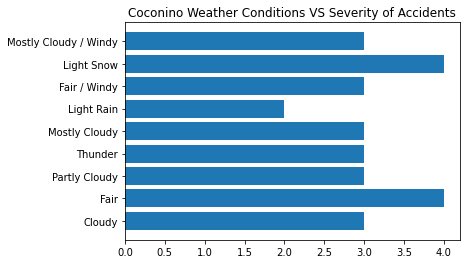

In [74]:
#Create Graph to show Weather conditions vs amount of accidents
x_value = us_data_coconino['Weather_Condition']
y_values = us_data_coconino['Severity']
plt.barh(x_value,y_values)
plt.title('Coconino Weather Conditions VS Severity of Accidents')
plt.show()

In [75]:
#Highest per day for Coconino Countuy
highest_perday = us_data_coconino.groupby(['Start_Time']).nunique()
highest_perdays = highest_perday[highest_perday['ID']==highest_perday['ID'].max()]
highest_perdays

ID  TMC  Severity  End_Time  City  County  State  Zipcode  \
Start_Time                                                              
2020-08-19   4    2         2         1     3       1      1        3   
2020-08-26   4    1         2         1     3       1      1        3   
2020-11-18   4    1         2         1     2       1      1        3   

            Country  Temperature(F)  ...  Wind_Speed(mph)  Precipitation(in)  \
Start_Time                           ...                                       
2020-08-19        1               2  ...                2                  1   
2020-08-26        1               4  ...                2                  1   
2020-11-18        1               3  ...                2                  1   

            Weather_Condition  Sunrise_Sunset  Stop  Traffic_Signal  Month  \
Start_Time                                                                   
2020-08-19                  1               2     1               1      1   
2020-08-26                  3               1     1               1      1   
2020-11-18                  1               1     1               1      1   

            Day  Year  Season  
Start_Time                     
2020-08-19    1     1       1  
2020-08-26    1     1       1  
2020-11-18    1     1       1  

[3 rows x 21 columns]

In [76]:
average_weather_coco = us_data_coconino.groupby('Start_Time').mean()
accident_count_coco = us_data_coconino.groupby('Start_Time').count()

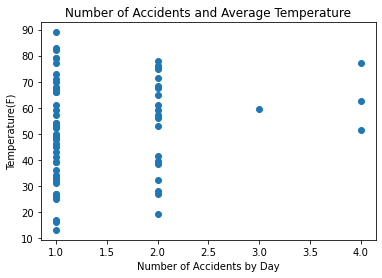

In [77]:
#Create Scatterplot to show correlation between accidents per day and windspeed
xvalue = accident_count_coco['ID']
yvalue = average_weather_coco['Temperature(F)']
plt.scatter(xvalue,yvalue)
plt.title('Number of Accidents and Average Temperature')
plt.xlabel('Number of Accidents by Day')
plt.ylabel('Temperature(F)')
plt.show()

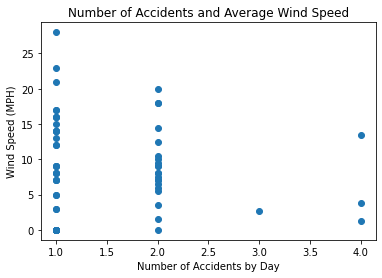

In [78]:
xvalue = accident_count_coco['ID']
yvalue = average_weather_coco['Wind_Speed(mph)']
plt.scatter(xvalue,yvalue)
plt.title('Number of Accidents and Average Wind Speed')
plt.xlabel('Number of Accidents by Day')
plt.ylabel('Wind Speed (MPH)')
plt.show()

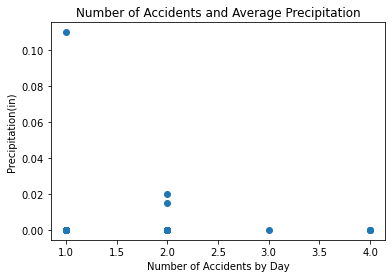

In [79]:
xvalue = accident_count_coco['ID']
yvalue = average_weather_coco['Precipitation(in)']
plt.scatter(xvalue,yvalue)
plt.title('Number of Accidents and Average Precipitation')
plt.xlabel('Number of Accidents by Day')
plt.ylabel('Precipitation(in)')
plt.show()

The Day of Week with Most Accidents in 2020 for Maricopa County is Thursday.


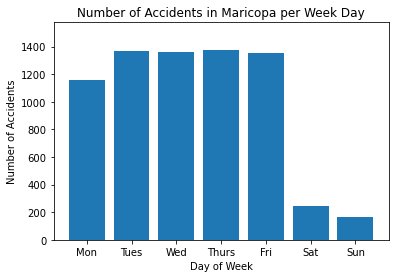

In [80]:
#Marciopa- Day of week with Highest Accident Rate
grouped_weekday = us_data_maricopa.groupby("Weekday").count()
grouped_weekday = pd.DataFrame(grouped_weekday)
grouped_weekday
weekday = ['Mon','Tues','Wed','Thurs','Fri','Sat','Sun']
total = [1158,1367,1360,1375,1354,247,166]
plt.bar(weekday,total)
plt.ylim(0,max(total)+200)
plt.title('Number of Accidents in Maricopa per Week Day')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
print('The Day of Week with Most Accidents in 2020 for Maricopa County is Thursday.')
plt.show()

In [81]:
#pull in weather csv  and pull in daily temperatures 
weather_path = r'Maricopa_weather_2020.csv'
marcicopa_weather = pd.read_csv(weather_path)
marcicopa_weather.head()


Year       DOY  Station Number  Air Temp Max  Air Temp Min  Air Temp Mean  \
0  2020  1/1/2020               6          15.0          -0.2            7.0   
1  2020  1/2/2020               6          16.7           1.4            8.4   
2  2020  1/3/2020               6          16.9          -0.2            7.4   
3  2020  1/4/2020               6          19.3           0.1            8.1   
4  2020  1/5/2020               6          18.9          -0.2            8.6   

   Daily Avg Temp (F)  RH - Max  RH- Min  RH - Mean  VPD - Mean  \
0               44.60      96.8     46.2       79.0        0.27   
1               47.12      97.1     28.2       72.9        0.38   
2               45.32      97.0     28.8       72.6        0.39   
3               46.58      96.1     27.2       71.4        0.44   
4               47.48      97.0     34.3       73.5        0.42   

   Solar Rad Total  Precipitation - Total  
0            11.87                    0.0  
1            12.88                    0.0  
2            12.77                    0.0  
3            12.96                    0.0  
4            13.48                    0.0

In [82]:
#create column that carries the month 
marcicopa_weather["Month"] = pd.DatetimeIndex(marcicopa_weather["DOY"]).month


In [83]:
#Group by Month and find average temperature per month
marcicopa_weather_avg = marcicopa_weather.groupby(['Month']).mean()
marcicopa_weather_avg

Year  Station Number  Air Temp Max  Air Temp Min  Air Temp Mean  \
Month                                                                    
1      2020               6     19.874194      2.064516      10.125806   
2      2020               6     22.644828      3.537931      12.117241   
3      2020               6     23.335484      8.825806      16.180645   
4      2020               6     30.536667     12.016667      21.796667   
5      2020               6     37.480645     17.861290      28.477419   
6      2020               6     40.360000     20.846667      31.286667   
7      2020               6     42.587097     26.974194      35.390323   
8      2020               6     43.283871     26.716129      35.258065   
9      2020               6     39.300000     21.083333      30.316667   
10     2020               6     34.522581     13.341935      23.693548   
11     2020               6     26.453333      7.163333      16.300000   
12     2020               6     19.590323      0.935484       9.625806   

       Daily Avg Temp (F)   RH - Max    RH- Min  RH - Mean  VPD - Mean  \
Month                                                                    
1               50.226452  94.274194  29.441935  67.112903    0.534839   
2               53.811034  85.468966  21.200000  52.079310    0.824138   
3               61.125161  85.396774  27.941935  55.761290    0.960000   
4               71.234000  59.946667  13.830000  30.953333    2.138000   
5               83.259355  45.909677   8.264516  20.735484    3.421290   
6               88.316000  41.216667   6.820000  18.133333    4.091000   
7               95.702581  49.229032  13.151613  26.280645    4.555806   
8               95.464516  57.551613  14.783871  30.903226    4.331613   
9               86.570000  54.370000  12.033333  27.960000    3.462333   
10              74.648387  59.461290  10.693548  28.264516    2.495806   
11              61.340000  68.153333  15.666667  36.336667    1.418667   
12              49.326452  82.541935  18.980645  48.167742    0.758065   

       Solar Rad Total  Precipitation - Total  
Month                                          
1            12.577097               0.163871  
2            16.002414               0.464138  
3            19.062258               0.918065  
4            25.919333               0.000000  
5            29.292258               0.008065  
6            29.922667               0.000000  
7            27.515806               0.000000  
8            24.638065               0.081613  
9            21.363333               0.034000  
10           17.892258               0.000000  
11           13.446000               0.000000  
12           11.649677               0.827742

In [84]:
#Groupby accidents per Month
us_data_maricopa_st = us_data_maricopa.groupby(['Start_Time']).count()

#Create a Graph comparing average monthly temperatures to accidents per month
x_axis = marcicopa_weather_avg['Daily Avg Temp (F)']
y_axis = us_data_maricopa_st['ID']

plt.scatter(x_axis,y_axis)
plt.show()


ValueError: x and y must be the same size

In [86]:
marcicopa_weather['DOY'] = pd.to_datetime(marcicopa_weather['DOY'])
combined_df = pd.merge(marcicopa_weather,us_data_maricopa_st,left_on='DOY',right_on='Start_Time')
combined_df

Year_x        DOY  Station Number  Air Temp Max  Air Temp Min  \
0      2020 2020-01-01               6          15.0          -0.2   
1      2020 2020-01-02               6          16.7           1.4   
2      2020 2020-01-03               6          16.9          -0.2   
3      2020 2020-01-04               6          19.3           0.1   
4      2020 2020-01-05               6          18.9          -0.2   
..      ...        ...             ...           ...           ...   
321    2020 2020-12-27               6          22.1           0.6   
322    2020 2020-12-28               6          19.6           7.0   
323    2020 2020-12-29               6          15.8           1.9   
324    2020 2020-12-30               6          17.6           0.5   
325    2020 2020-12-31               6          13.9          -2.1   

     Air Temp Mean  Daily Avg Temp (F)  RH - Max  RH- Min  RH - Mean  ...  \
0              7.0               44.60      96.8     46.2       79.0  ...   
1              8.4               47.12      97.1     28.2       72.9  ...   
2              7.4               45.32      97.0     28.8       72.6  ...   
3              8.1               46.58      96.1     27.2       71.4  ...   
4              8.6               47.48      97.0     34.3       73.5  ...   
..             ...                 ...       ...      ...        ...  ...   
321           11.0               51.80      84.8     20.1       49.9  ...   
322           13.6               56.48      84.7     27.3       45.2  ...   
323            8.5               47.30      97.1     33.7       65.1  ...   
324            8.5               47.30      87.0     11.8       43.1  ...   
325            6.4               43.52      75.0     25.0       41.9  ...   

     Precipitation(in)  Weather_Condition  Sunrise_Sunset  Stop  \
0                   22                 22              22    22   
1                   54                 54              54    54   
2                   62                 62              62    62   
3                    6                  6               6     6   
4                    7                  7               7     7   
..                 ...                ...             ...   ...   
321                  7                  7               7     7   
322                 18                 18              18    18   
323                 14                 14              14    14   
324                 25                 25              25    25   
325                 15                 15              15    15   

     Traffic_Signal  Weekday  Month_y  Day  Year_y  Season  
0                22       22       22   22      22      22  
1                54       54       54   54      54      54  
2                62       62       62   62      62      62  
3                 6        6        6    6       6       6  
4                 7        7        7    7       7       7  
..              ...      ...      ...  ...     ...     ...  
321               7        7        7    7       7       7  
322              18       18       18   18      18      18  
323              14       14       14   14      14      14  
324              25       25       25   25      25      25  
325              15       15       15   15      15      15  

[326 rows x 36 columns]

In [87]:
combined_df = pd.DataFrame(combined_df)


In [88]:
combined_df.to_csv('combined_df.csv',encoding='utf-8')

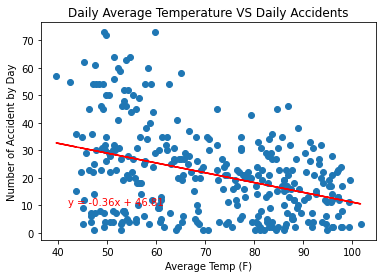

In [89]:
#Final Graph- showing daily accidents vs average temperature 
x_axis = combined_df['Daily Avg Temp (F)']
y_axis = us_data_maricopa_st['ID']
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_axis, y_axis) 
regress_values = x_axis * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-") 
plt.annotate(line_eq,(42,10),fontsize=10,color="red")
plt.title('Daily Average Temperature VS Daily Accidents')
plt.xlabel('Average Temp (F)')
plt.ylabel('Number of Accident by Day')
plt.show()
